In [5]:
#
#  File:
#    NUG_curvilinear_contour_PyNGL.py
#
#  Synopsis:
#    Illustrates how to create cell-filled contours of curvilinear data
#
#  Categories:
#    contour plots
#
#  Author:
#    Karin Meier-Fleischer
#  
#  Date of initial publication:
#    June 2015
#
#  Description:
#    This example shows how to create cell-filled contours over
#    a map using curvilinear data.
#
#  Effects illustrated:
#    o  Using cell fill mode
#    o  Drawing filled contours over a map
#    o  Plotting edges of the curvilinear grid
# 
#  Output:
#    One visualization is produced.

#
#  Notes: The data for this example can be downloaded from 
#    http://www.ncl.ucar.edu/Document/Manuals/NCL_User_Guide/Data/
from __future__ import print_function
import Ngl,Nio
import os,sys

#--  define variables
diri   = "./"                                 #-- data directory
fname  = "tos_ocean_bipolar_grid.nc"          #-- curvilinear data 
ffile  = os.path.join(diri, fname)


In [6]:
#---Test if file exists
if(not os.path.exists(ffile)):
    print("You do not have the necessary file ({}) to run this example.".format(ffile))
    print("You can get the files from the NCL website at:")
    print("http://www.ncl.ucar.edu/Document/Manuals/NCL_User_Guide/Data/")
    sys.exit()

In [7]:
#--  open file and read variables
f      = Nio.open_file(ffile, "r")
var    = f.variables["tos"][0,:,:]            #-- first time step, reverse latitude
lat2d  = f.variables["lat"][:,:]              #-- 2D latitudes 
lon2d  = f.variables["lon"][:,:]              #-- 2D longitudes

In [9]:
#-- open a workstation
wks_type              = "png"                 #-- output type
wks_name              = "NUG_curvilinear_contour_PyNGL"
wks                   =  Ngl.open_wks(wks_type,wks_name)

In [12]:

#-- set resources
res                   =  Ngl.Resources()      #-- generate an resources object for plot

res.cnFillOn          =  True                 #-- turn on contour fill
res.cnLinesOn         =  False                #-- don't draw contour lines
res.cnLineLabelsOn    =  False                #-- don't draw line labels
res.cnFillPalette     = "BlueWhiteOrangeRed"  #-- set color map
res.cnFillMode        = "CellFill"            #-- change contour fill mode
res.cnCellFillEdgeColor =  "black"            #-- edges color
res.cnCellFillMissingValEdgeColor = "gray50"  #-- missing value edges color
res.cnMissingValFillColor = "gray50"          #-- missing value fill color

res.lbOrientation     = "Horizontal"          #-- labelbar orientation

res.tiMainString      = "Curvilinear grid:  MPI-ESM-LR  (2D lat/lon arrays)"  #-- title string
res.tiMainFontHeightF =  0.022                #-- main title font size

res.sfXArray          =  lon2d                #-- longitude grid cell center
res.sfYArray          =  lat2d                #-- latitude grid cell center

res.mpFillOn          =  False                #-- don't draw filled map
res.mpGridLatSpacingF =  10.                  #-- grid lat spacing
res.mpGridLonSpacingF =  10.                  #-- grid lon spacing

res.mpDataBaseVersion = "MediumRes"           #-- map database
res.mpLimitMode       = "LatLon"              #-- must be set using minLatF/maxLatF/minLonF/maxLonF
res.mpMinLatF         = -10.                  #-- sub-region minimum latitude
res.mpMaxLatF         =  80.                  #-- sub-region maximum latitude
res.mpMinLonF         = -120.                 #-- sub-region minimum longitude
res.mpMaxLonF         =  60.                  #-- sub-region maximum longitude

#-- create the plot
plot = Ngl.contour_map(wks,var,res)           #-- create the contour plot

#-- end

Ngl.end()

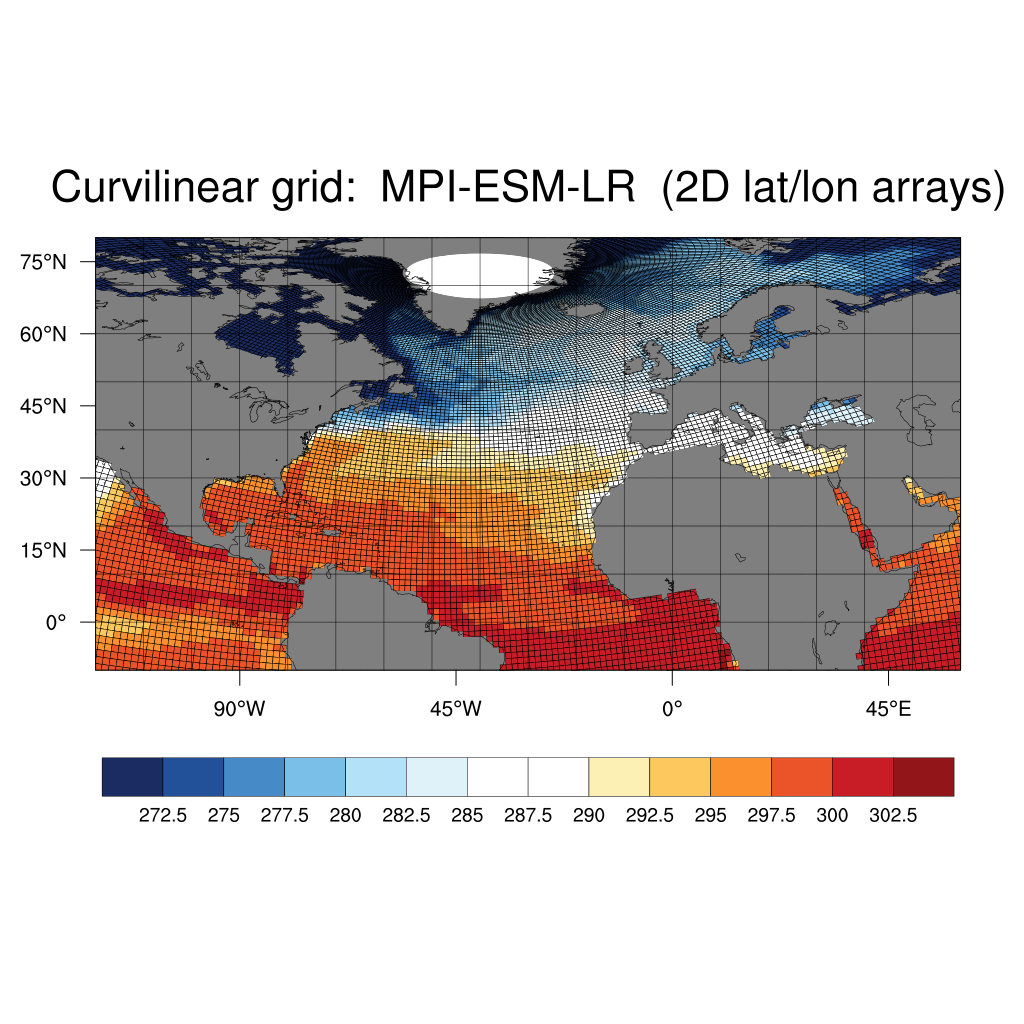